<a href="https://colab.research.google.com/github/mkosaka1/Speech_Emotion_Recognition/blob/master/3.%20Transfer_Learning%20-%20Initial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import os
import itertools

import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
import cv2
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models, Model, optimizers




# Labels

In [3]:
import glob
angry = glob.glob('/content/drive/My Drive/train_logmel/angry/*.*')
calm = glob.glob('/content/drive/My Drive/train_logmel/calm/*.*')
disgust = glob.glob('/content/drive/My Drive/train_logmel/disgust/*.*')
fearful = glob.glob('/content/drive/My Drive/train_logmel/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/train_logmel/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/train_logmel/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/train_logmel/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/train_logmel/surprised/*.*')

In [4]:
train_data = []
train_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Surprised')

train_data = np.array(train_data)
train_labels = np.array(train_labels)


In [5]:
X_train=train_data
y_train=train_labels

In [6]:
import glob
angry = glob.glob('/content/drive/My Drive/test_logmel/angry/*.*')
calm = glob.glob('/content/drive/My Drive/test_logmel/calm/*.*')
disgust = glob.glob('/content/drive/My Drive/test_logmel/disgust/*.*')
fearful = glob.glob('/content/drive/My Drive/test_logmel/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/test_logmel/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/test_logmel/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/test_logmel/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/test_logmel/surprised/*.*')

In [7]:
test_data = []
test_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Surprised')

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [8]:
X_test=test_data
y_test=test_labels

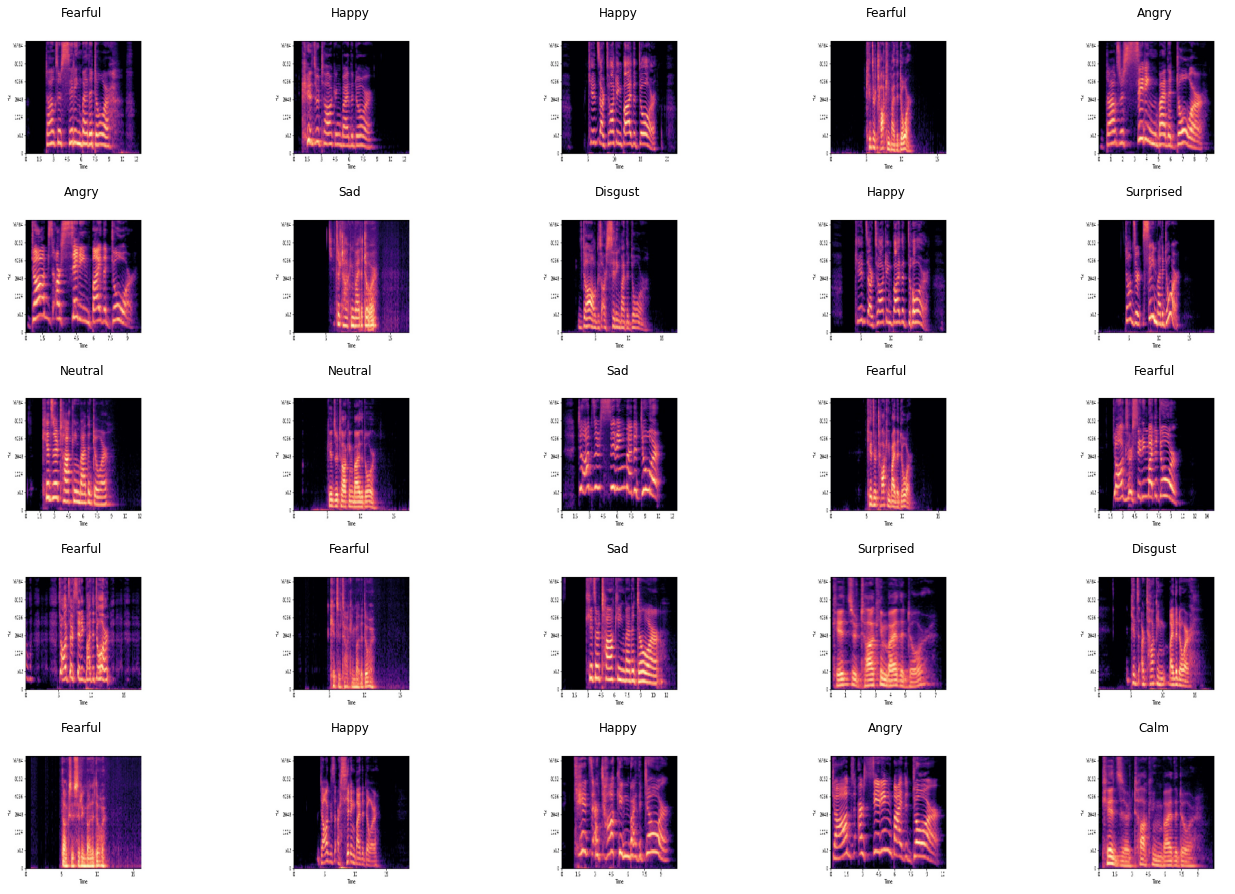

In [9]:
from random import randint
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [9]:

# Check shapes of training and testing sets
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (1152, 224, 224, 3), y_train has a shape of (1152,)
X_test has a shape of (288, 224, 224, 3), y_test has a shape of (288,)


In [10]:
# Finally, we normalize pixels in X_train and X_test to the range [0,1] for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


# VGG16

In [ ]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_15 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


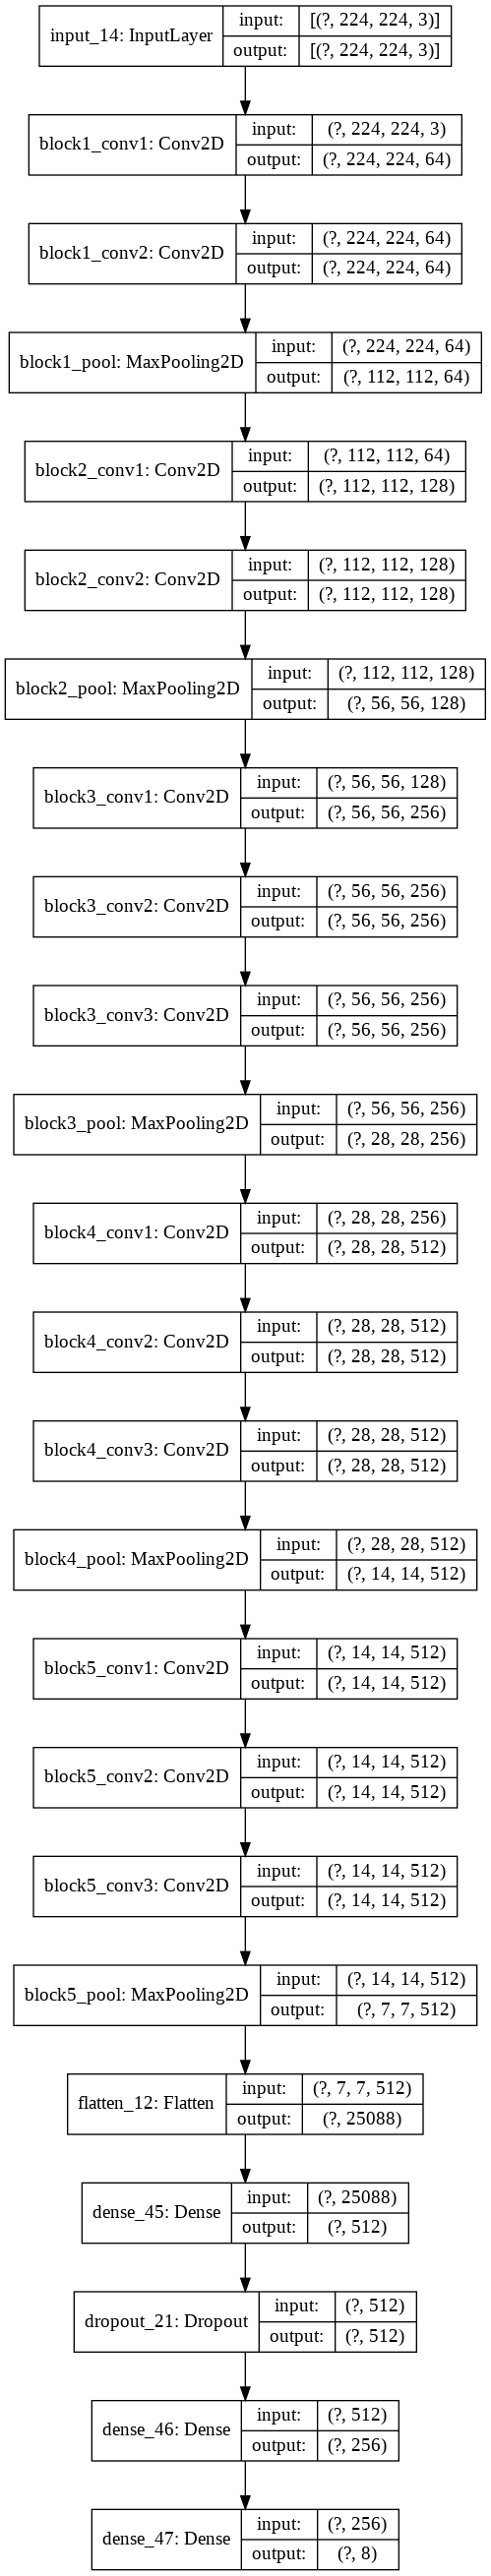

In [ ]:
keras.utils.plot_model(transfer_model, show_shapes=True)

In [ ]:

from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

In [ ]:

# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
1152/1152 [==============================] - 20s 17ms/step - loss: 2.1411 - accuracy: 0.1736 - val_loss: 1.9085 - val_accuracy: 0.2674
Epoch 2/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.9526 - accuracy: 0.2309 - val_loss: 1.8582 - val_accuracy: 0.3438
Epoch 3/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.8006 - accuracy: 0.3194 - val_loss: 1.6504 - val_accuracy: 0.4097
Epoch 4/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.6897 - accuracy: 0.3481 - val_loss: 1.5975 - val_accuracy: 0.4201
Epoch 5/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.6386 - accuracy: 0.3819 - val_loss: 1.5117 - val_accuracy: 0.4479
Epoch 6/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.5634 - accuracy: 0.3976 - val_loss: 1.4729 - val_accuracy: 0.4549
Epoch 7/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.4716 - accuracy: 0.4210 - val_loss: 1.3813 -

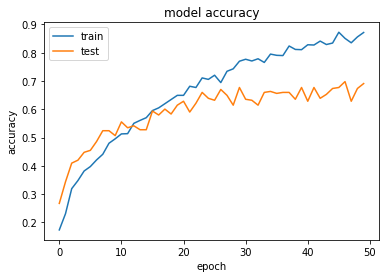

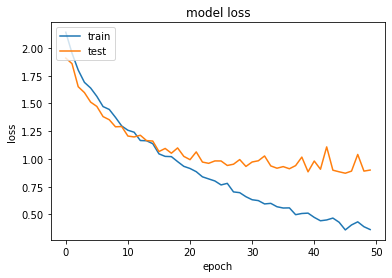

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

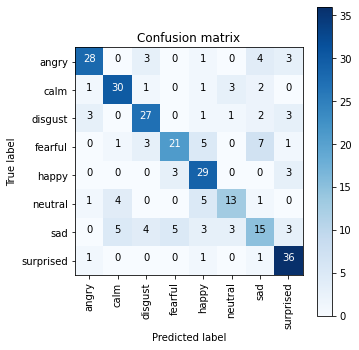

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.82      0.72      0.77        39
        calm       0.75      0.79      0.77        38
     disgust       0.71      0.73      0.72        37
     fearful       0.72      0.55      0.63        38
       happy       0.63      0.83      0.72        35
     neutral       0.65      0.54      0.59        24
         sad       0.47      0.39      0.43        38
   surprised       0.73      0.92      0.82        39

    accuracy                           0.69       288
   macro avg       0.69      0.68      0.68       288
weighted avg       0.69      0.69      0.68       288



# VGG16 Fine-Tuning

In [ ]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [ ]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.3, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


In [ ]:

from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

In [ ]:
# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test), callbacks=[lr_reduce,checkpoint])

Epoch 1/50
1152/1152 [==============================] - ETA: 0s - loss: 1.9581 - accuracy: 0.2161WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0024s vs `on_test_batch_end` time: 0.0055s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.32639, saving model to finetune.h15
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: finetune.h15/assets
1152/1152 [==============================] - 26s 22ms/step - loss: 1.9581 - accuracy: 0.2161 - val_loss: 1.6475 - val_accuracy: 0.3264
Epoch 2/50
1151/1152 [============================>.] - ETA: 0s - loss: 1.5666 - accuracy: 0.4118
Epoch 00002: val_accuracy improved from 0.32639 to 0.50694, saving model to finetune.h15
INFO:tensorflow:Assets written t

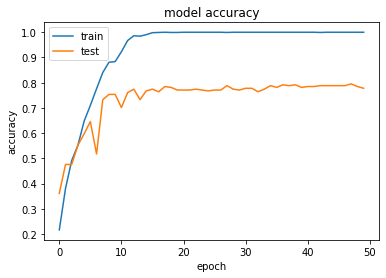

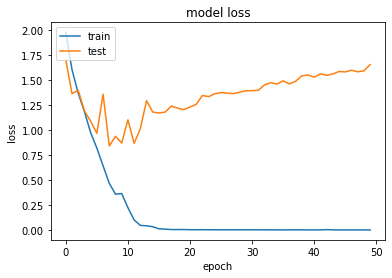

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

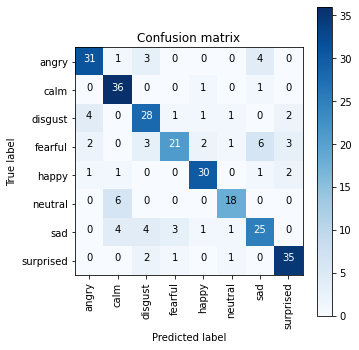

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.82      0.79      0.81        39
        calm       0.75      0.95      0.84        38
     disgust       0.70      0.76      0.73        37
     fearful       0.81      0.55      0.66        38
       happy       0.86      0.86      0.86        35
     neutral       0.82      0.75      0.78        24
         sad       0.68      0.66      0.67        38
   surprised       0.83      0.90      0.86        39

    accuracy                           0.78       288
   macro avg       0.78      0.78      0.77       288
weighted avg       0.78      0.78      0.77       288



# VGG16 Image Augmentation

In [ ]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_5 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten_3 True
20 dense_9 True
21 dropout_3 True
22 dense_10 True
23 dense_11 True


In [ ]:
from keras.callbacks import ReduceLROnPlateau

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

# stop training when val_accuracy has stopped improving
early_stop = EarlyStopping(monitor='val_accuracy',
                                       patience=8,
                                       verbose=1,
                                       mode='max')

checkpoint = ModelCheckpoint('iaB6.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: ['Angry', 'Angry', 'Angry', 'Angry', 'Angry']


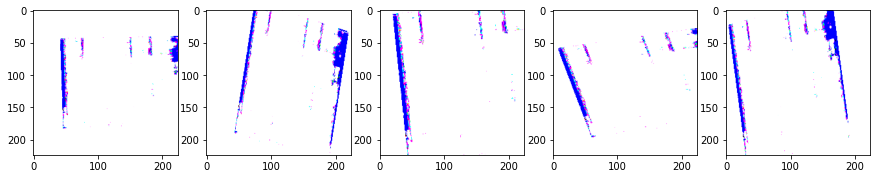

In [ ]:
img_id=3
img_generator = train_datagen.flow(train_data[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
angry_img = [next(img_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in angry_img])
l = [ax[i].imshow(angry_img[i][0][0]) for i in range(0,5)]

In [ ]:
train_datagen = ImageDataGenerator( 
                                  zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.15)
                                  #  height_shift_range=0.3, 
                                  #  horizontal_flip = True,
                                  #  vertical_flip=True,
                                  #  shear_range=0.3,
                                  #  fill_mode="nearest")                                


train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)


learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=300,
                    validation_data=(X_test,y_test),
                    # validation_steps=50,
                    epochs=80,
                    shuffle=True,
                    callbacks=[lr_reduce,checkpoint],
                    verbose=1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
1152/1152 [==============================] - 19s 16ms/step - loss: 2.2775 - accuracy: 0.1423 - val_loss: 2.0248 - val_accuracy: 0.1910

Epoch 00001: val_accuracy improved from -inf to 0.19097, saving model to iaB6.h15
INFO:tensorflow:Assets written to: iaB6.h15/assets
Epoch 2/80
1152/1152 [==============================] - 19s 16ms/step - loss: 2.0678 - accuracy: 0.1702 - val_loss: 1.9279 - val_accuracy: 0.3368

Epoch 00002: val_accuracy improved from 0.19097 to 0.33681, saving model to iaB6.h15
INFO:tensorflow:Assets written to: iaB6.h15/assets
Epoch 3/80
1152/1152 [==============================] - 18s 16ms/step - loss: 2.0066 - accuracy: 0.1845 - val_loss: 1.8628 - val_accuracy: 0.2639

Epoch 00003: val_accuracy did not improve from 0.33681
Epoch 4/80
1152/1152 [==============================] - 18s 16ms/step - loss: 1.9679 - accuracy: 0.1948 - val_loss: 1.8519 - val_accuracy: 0.2604

Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.749999880004907e-05.

Epoch 0

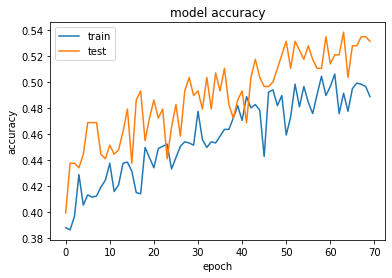

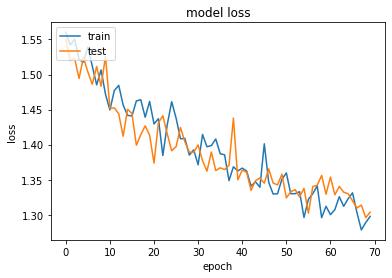

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

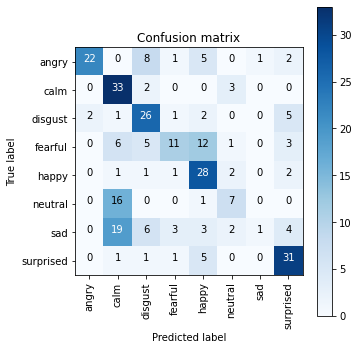

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.92      0.56      0.70        39
        calm       0.43      0.87      0.57        38
     disgust       0.53      0.70      0.60        37
     fearful       0.61      0.29      0.39        38
       happy       0.50      0.80      0.62        35
     neutral       0.47      0.29      0.36        24
         sad       0.50      0.03      0.05        38
   surprised       0.66      0.79      0.72        39

    accuracy                           0.55       288
   macro avg       0.58      0.54      0.50       288
weighted avg       0.58      0.55      0.51       288



# VGG16 Fine Tuning With Image Augmentation

In [ ]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten True
20 dense True
21 dropout True
22 dense_1 True
23 dense_2 True


In [ ]:
from keras.callbacks import ReduceLROnPlateau

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('ftzq.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


In [ ]:
train_datagen = ImageDataGenerator(
                                    zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.15)
#                                   #  height_shift_range=0.4,
#                                   #  shear_range=0.3,
#                                   #  horizontal_flip=True, 
#                                   #  fill_mode='nearest')

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)

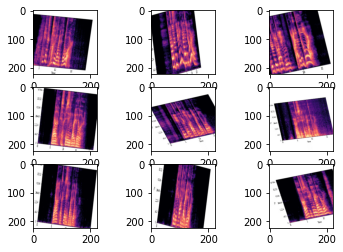

In [ ]:
from matplotlib import pyplot
img_rows, img_cols = 224, 224

for x, y in train_datagen.flow(X_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=10,
                    validation_data=(X_test,y_test),
                    # validation_steps=20,
                    epochs=80,
                    callbacks=[lr_reduce,checkpoint])
                    # shuffle=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
1152/1152 [==============================] - 32s 21ms/step - loss: 2.1360 - accuracy: 0.1562 - val_loss: 1.9150 - val_accuracy: 0.2812

Epoch 00001: val_accuracy improved from -inf to 0.28125, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
Epoch 2/80
1152/1152 [==============================] - 23s 20ms/step - loss: 1.8515 - accuracy: 0.2900 - val_loss: 1.6185 - val_accuracy: 0.3507

Epoch 00002: val_accuracy improved from 0.28125 to 0.35069, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
Epoch 3/80
1152/1152 [==============================] - 23s 20ms/step - loss: 1.6946 - accuracy: 0.3267 - val_loss: 1.3941 - val_accuracy: 0.4375

Epoch 00003: val_accuracy improved from 0.35069 to 0.43750, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
Epoch 4/80
1152/1152 [==============================] - 24s 21ms/step - loss: 1.4707 - accuracy: 0.4336 - val_loss: 1.3001 - val_accuracy: 0.4896

Epoch 0

In [ ]:
transfer_model.save_weights("vgg16fineaugment_weights.h5")
transfer_model.save('vgg16fineaugment.h5')
print("Saved model to disk")

Saved model to disk


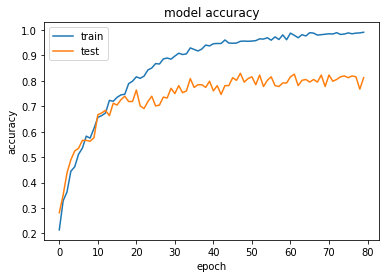

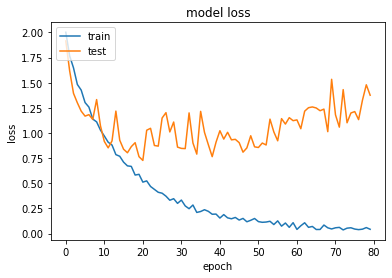

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

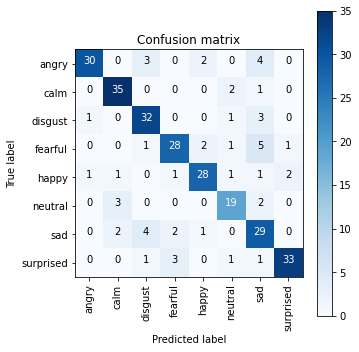

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.94      0.77      0.85        39
        calm       0.85      0.92      0.89        38
     disgust       0.78      0.86      0.82        37
     fearful       0.82      0.74      0.78        38
       happy       0.85      0.80      0.82        35
     neutral       0.76      0.79      0.78        24
         sad       0.63      0.76      0.69        38
   surprised       0.92      0.85      0.88        39

    accuracy                           0.81       288
   macro avg       0.82      0.81      0.81       288
weighted avg       0.82      0.81      0.81       288



# Inception Fine-Tuning

In [12]:
from keras.applications import InceptionV3
pretrained_model=InceptionV3(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [13]:
for layer in pretrained_model.layers[:294]:
  layer.trainable=False

In [14]:
x=layers.Flatten()(pretrained_model.output)
x=layers.Dense(256,activation='relu')(x)
x=layers.Dropout(0.01)(x)
x=layers.Dense(8,activation='softmax')(x)
model=Model(pretrained_model.input,x)


In [15]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(pretrained_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [16]:
from keras.callbacks import ReduceLROnPlateau

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.3,
                                          patience=1,
                                          verbose=1,
                                          min_lr=0.000001)
                                          

# stop training when val_accuracy has stopped improving
early_stop = EarlyStopping(monitor='val_accuracy',
                                       patience=8,
                                       verbose=1,
                                       mode='max')

checkpoint = ModelCheckpoint('inception_ftu35.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


In [17]:
learning_rate= 5e-5
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                            epochs=30,
                            batch_size=16,
                            callbacks=[lr_reduce,checkpoint])

Epoch 1/30
72/72 [==============================] - 16s 70ms/step - loss: 2.0665 - accuracy: 0.2768 - val_loss: 1.4050 - val_accuracy: 0.4722

Epoch 00001: val_accuracy improved from -inf to 0.47222, saving model to inception_ftu35.h15
INFO:tensorflow:Assets written to: inception_ftu35.h15/assets
Epoch 2/30
72/72 [==============================] - 4s 53ms/step - loss: 0.9632 - accuracy: 0.6656 - val_loss: 1.2948 - val_accuracy: 0.5278

Epoch 00002: val_accuracy improved from 0.47222 to 0.52778, saving model to inception_ftu35.h15
INFO:tensorflow:Assets written to: inception_ftu35.h15/assets
Epoch 3/30
72/72 [==============================] - 4s 52ms/step - loss: 0.5338 - accuracy: 0.8522 - val_loss: 1.1682 - val_accuracy: 0.5660

Epoch 00003: val_accuracy improved from 0.52778 to 0.56597, saving model to inception_ftu35.h15
INFO:tensorflow:Assets written to: inception_ftu35.h15/assets
Epoch 4/30
72/72 [==============================] - 4s 53ms/step - loss: 0.3169 - accuracy: 0.9263 - v

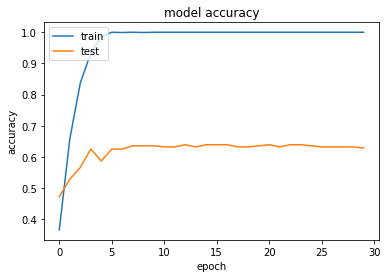

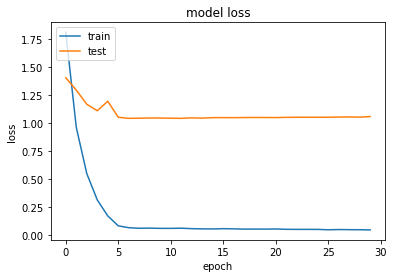

In [18]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

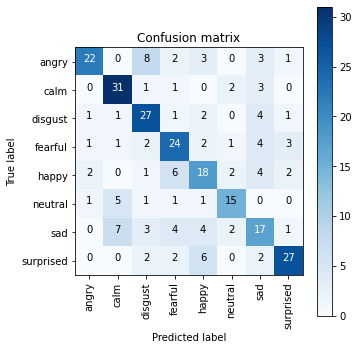

In [20]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.81      0.56      0.67        39
        calm       0.69      0.82      0.75        38
     disgust       0.60      0.73      0.66        37
     fearful       0.59      0.63      0.61        38
       happy       0.50      0.51      0.51        35
     neutral       0.68      0.62      0.65        24
         sad       0.46      0.45      0.45        38
   surprised       0.77      0.69      0.73        39

    accuracy                           0.63       288
   macro avg       0.64      0.63      0.63       288
weighted avg       0.64      0.63      0.63       288



# Inception Fine Tuning + Augmentation

In [26]:
train_datagen = ImageDataGenerator(
                                    zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.05)
                                  #  height_shift_range=0.9)
                                  #  shear_range=0.3,
                                  # horizontal_flip=True,
                                  #  fill_mode='nearest')

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=8)

checkpoint = ModelCheckpoint('incepti_f45.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

learning_rate= 5e-5
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = model.fit_generator(train_generator,
                    # steps_per_epoch=train_steps_per_epoch,
                    validation_data=(X_test,y_test),
                    # validation_steps=val_steps_per_epoch,
                    epochs=100,
                    shuffle=True,
                    callbacks=[lr_reduce,checkpoint],
                    verbose=1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
144/144 [==============================] - 20s 113ms/step - loss: 1.1601 - accuracy: 0.5751 - val_loss: 1.4197 - val_accuracy: 0.5521

Epoch 00001: val_accuracy improved from -inf to 0.55208, saving model to incepti_f45.h15
INFO:tensorflow:Assets written to: incepti_f45.h15/assets
Epoch 2/100
144/144 [==============================] - 14s 97ms/step - loss: 1.1810 - accuracy: 0.6045 - val_loss: 1.2024 - val_accuracy: 0.5764

Epoch 00002: val_accuracy improved from 0.55208 to 0.57639, saving model to incepti_f45.h15
INFO:tensorflow:Assets written to: incepti_f45.h15/assets
Epoch 3/100
144/144 [==============================] - 14s 99ms/step - loss: 1.0170 - accuracy: 0.6167 - val_loss: 1.3929 - val_accuracy: 0.5139

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.4999999621068127e-05.

Epoch 00003: val_accuracy did not improve from 0.57639
Epoch 4/100
144/144 [==============================] - 14s 98ms/step - loss: 1.0089 - accuracy: 0.6146 - val_loss: 1.1729 - val

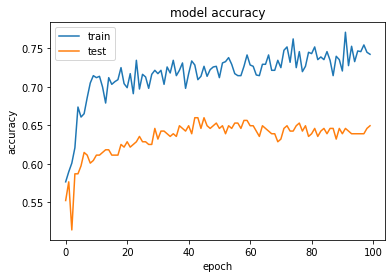

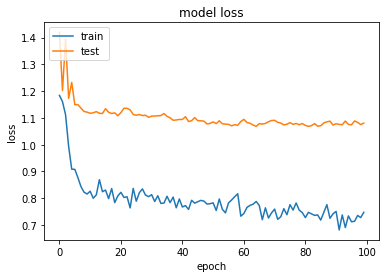

In [27]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

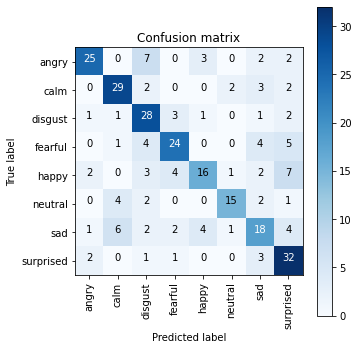

In [28]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.81      0.64      0.71        39
        calm       0.71      0.76      0.73        38
     disgust       0.57      0.76      0.65        37
     fearful       0.71      0.63      0.67        38
       happy       0.67      0.46      0.54        35
     neutral       0.79      0.62      0.70        24
         sad       0.51      0.47      0.49        38
   surprised       0.58      0.82      0.68        39

    accuracy                           0.65       288
   macro avg       0.67      0.65      0.65       288
weighted avg       0.66      0.65      0.65       288



#VGG19

In [ ]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
img_height, img_width = 224,224
conv_base = vgg19.VGG19(weights='imagenet', pooling='avg', include_top=False, input_shape = (img_width, img_height, 3))

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f557cd145c0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e90940> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e905c0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f5585e902e8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e875c0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c94e0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f55866c8550> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c8358> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c77f0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5586c7f908> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f557cd786d8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f557cd4e

In [ ]:
for layer in conv_base.layers[:12]:
    layer.trainable = False

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f557cd145c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e90940> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e905c0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f5585e902e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e875c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c94e0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f55866c8550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c8358> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c77f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5586c7f908> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f557cd786d8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [ ]:
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
# model = models.Sequential()
# model.add(conv_base)
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
# model.summary()

model = models.Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 4104      
Total params: 21,078,600
Trainable params: 18,753,032
Non-trainable params: 2,325,568
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

batch_size=1
learning_rate = 5e-5
epochs = 40
checkpoint = ModelCheckpoint("vgg_19_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit(X_train, y_train,batch_size=batch_size,
                              epochs=epochs,
                              shuffle=True, 
                              validation_data=(X_test,y_test),
                              callbacks=[checkpoint]
                              )

Epoch 1/40
1151/1152 [============================>.] - ETA: 0s - loss: 2.9605 - acc: 0.1295WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0023s vs `on_test_batch_end` time: 0.0073s). Check your callbacks.

Epoch 00001: val_acc improved from -inf to 0.13194, saving model to vgg_19_classifier.h5
1152/1152 [==============================] - 40s 34ms/step - loss: 2.9602 - acc: 0.1302 - val_loss: 2.7200 - val_acc: 0.1319
Epoch 2/40
1151/1152 [============================>.] - ETA: 0s - loss: 2.6420 - acc: 0.1225
Epoch 00002: val_acc improved from 0.13194 to 0.13542, saving model to vgg_19_classifier.h5
1152/1152 [==============================] - 39s 34ms/step - loss: 2.6420 - acc: 0.1224 - val_loss: 2.5887 - val_acc: 0.1354
Epoch 3/40
1151/1152 [============================>.] - ETA: 0s - loss: 2.5738 - acc: 0.1260
Epoch 00003: val_acc improved from 0.13542 to 0.16319, saving model to vgg_19_classifier.h5
1152/1152 [==============

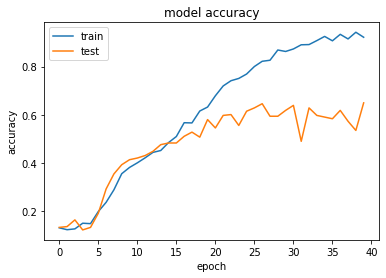

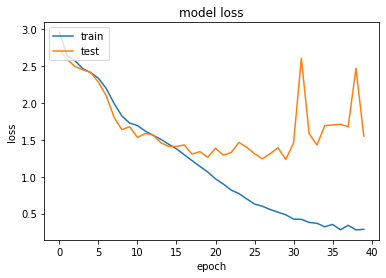

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

# VGG19 Data Augmentation

In [ ]:
#Image Data Augmentation
train_datagen = ImageDataGenerator(rotation_range=4, horizontal_flip=True, zoom_range=.1)

#Fitting the augmentation defined above to the data
# train_generator.fit(X_train)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)

from keras.callbacks import ReduceLROnPlateau

lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)


In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f557cd145c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e90940> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e905c0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f5585e902e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e875c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c94e0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f55866c8550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c8358> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c77f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5586c7f908> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f557cd786d8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [ ]:
for layer in conv_base.layers[:-12]:
    layer.trainable = False

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f557cd145c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e90940> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e905c0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f5585e902e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5585e875c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c94e0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f55866c8550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c8358> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f55866c77f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5586c7f908> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f557cd786d8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [ ]:
input_shape=(224,224,3)

model = models.Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-5
epochs = 40
batch_size=16
checkpoint = ModelCheckpoint("vgg19augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])
history = model.fit(train_generator,
                              epochs = epochs, 
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = (X_test,y_test), 
                              callbacks=[checkpoint], 
                              verbose = 1,
                              shuffle=True
                              )



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 4104      
Total params: 21,078,600
Trainable params: 18,753,032
Non-trainable params: 2,325,568
_________________________________________________________________
Epoch 1/40
1151/1152 [============================>.] - ETA: 0s - loss: 2.5247 - acc: 0.1225WARNING:

KeyboardInterrupt: ignored

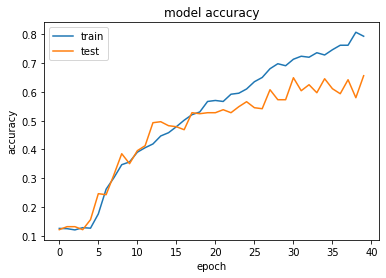

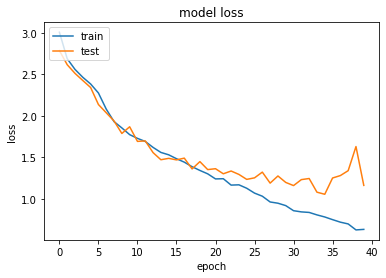

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()